<a href="https://colab.research.google.com/github/anadrakou/Human_Scream_Detection/blob/main/CNN_f1_score_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baseline
##CNN with F1-score callbacks
We will enhance our training process by incorporating a custom callback to compute and visualize the F1 score over epochs. This metric offers a comprehensive evaluation of our model's performance on imbalanced data, as it considers both precision and recall. This modification aims to provide deeper insights into how effectively the model handles the complexities of our dataset.

Correctly identifying screams (high recall) is crucial to ensure prompt response or action. The F1 score balances both precision and recall, giving a single metric that indicates how well the model performs in detecting both positive and negative instances, with a focus on correctly identifying screams.

In [ ]:
#Installing the needed libraries
!pip install librosa tensorflow matplotlib

### Importing libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from keras.callbacks import Callback, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/My Drive/DeepLearning/code/dataset/"

X_train = np.load(data_path + 'X_train.npy')
X_val = np.load(data_path + 'X_val.npy')
X_test = np.load(data_path + 'X_test.npy')
y_train = np.load(data_path + 'y_train.npy')
y_val = np.load(data_path + 'y_val.npy')
y_test = np.load(data_path + 'y_test.npy')
X_train_da = np.load(data_path + 'X_train_da.npy')
y_train_da = np.load(data_path + 'y_train_da.npy')

### Build  and Train the model in Baseline

In [ ]:
class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data
        self.best_f1 = 0  # Initialize best F1 score

    def on_epoch_end(self, epoch, logs=None):
        val_pred = self.model.predict(self.validation_data[0])
        val_pred_classes = np.argmax(val_pred, axis=1)
        val_true = np.argmax(self.validation_data[1], axis=1)
        f1 = f1_score(val_true, val_pred_classes, average='macro')
        print(f' - val_f1_score: {f1:.4f}')
        logs['val_f1_score'] = f1


        if f1 > self.best_f1:
            self.best_f1 = f1
            self.model.save('best_model.h5')  # Save the best model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(2, activation='softmax')  # Two classes: screaming (1) and not screaming (0)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.reshape((*X_train.shape, 1))
X_val = X_val.reshape((*X_val.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[f1_callback, early_stopping])

Epoch 1/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.6620


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 640s 7s/step - loss: 26.2214 - accuracy: 0.7788 - val_loss: 0.5409 - val_accuracy: 0.7622 - val_f1_score: 0.6620
Epoch 2/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7128


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 623s 7s/step - loss: 0.5163 - accuracy: 0.8164 - val_loss: 0.5096 - val_accuracy: 0.7794 - val_f1_score: 0.7128
Epoch 3/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7228


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 652s 7s/step - loss: 0.4152 - accuracy: 0.8482 - val_loss: 0.5380 - val_accuracy: 0.7966 - val_f1_score: 0.7228
Epoch 4/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7352


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 626s 7s/step - loss: 0.3131 - accuracy: 0.8901 - val_loss: 0.5860 - val_accuracy: 0.7908 - val_f1_score: 0.7352
Epoch 5/20
11/11 [==============================] - 22s 2s/step
 - val_f1_score: 0.6675
88/88 [==============================] - 647s 7s/step - loss: 0.2428 - accuracy: 0.9170 - val_loss: 0.8506 - val_accuracy: 0.7650 - val_f1_score: 0.6675
Epoch 6/20
11/11 [==============================] - 22s 2s/step
 - val_f1_score: 0.6935
88/88 [==============================] - 641s 7s/step - loss: 0.1744 - accuracy: 0.9420 - val_loss: 0.7797 - val_accuracy: 0.7679 - val_f1_score: 0.6935
Epoch 7/20
11/11 [==============================] - 22s 2s/step
 - val_f1_score: 0.7059
88/88 [==============================] - 643s 7s/step - loss: 0.1244 - accuracy: 0.9560 - val_loss: 0.9081 - val_accuracy: 0.7765 - val_f1_score: 0.7059


###Evaluate the Model in Baseline

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))
print('Confusion Matrix:')
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes))


11/11 [==============================] - 21s 2s/step - loss: 0.5366 - accuracy: 0.7686
Test accuracy: 0.7685714364051819
11/11 [==============================] - 20s 2s/step
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       252
           1       0.68      0.33      0.44        98

    accuracy                           0.77       350
   macro avg       0.73      0.63      0.65       350
weighted avg       0.75      0.77      0.74       350

Confusion Matrix:
[[237  15]
 [ 66  32]]


11/11 [==============================] - 20s 2s/step


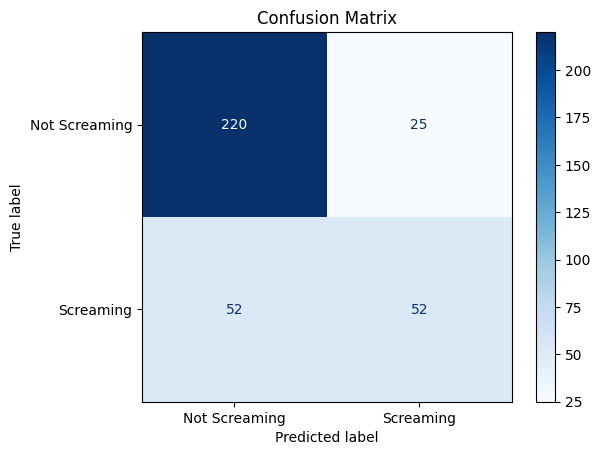

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Plot the Model in Baseline

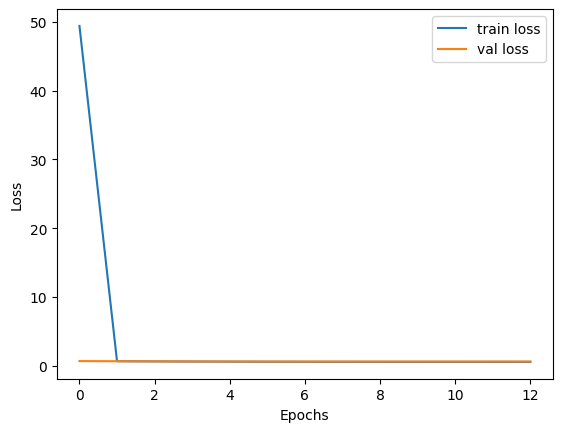

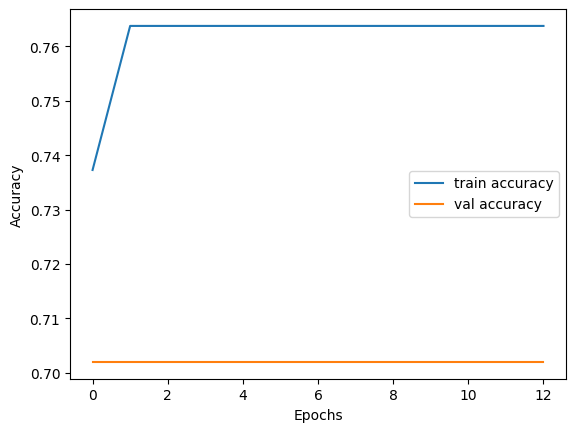

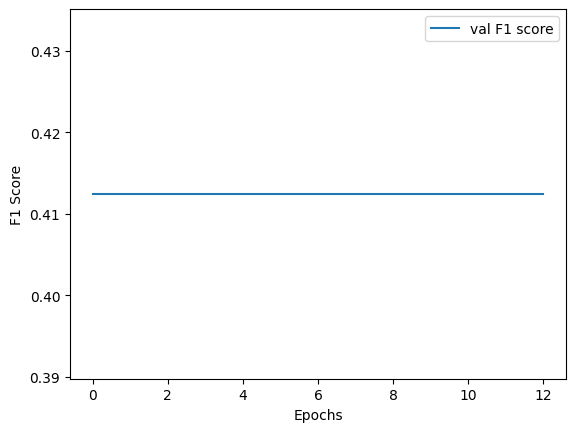

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting F1 score curve
plt.plot(history.history['val_f1_score'], label='val F1 score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

## CNN Callbacks F1-score after Data Augmentation

###Build and Train the Model after Data Augmentation

In [ ]:
class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data
        self.best_f1 = 0  # Initialize best F1 score

    def on_epoch_end(self, epoch, logs=None):
        val_pred = self.model.predict(self.validation_data[0])
        val_pred_classes = np.argmax(val_pred, axis=1)
        val_true = np.argmax(self.validation_data[1], axis=1)
        f1 = f1_score(val_true, val_pred_classes, average='macro')
        print(f' - val_f1_score: {f1:.4f}')
        logs['val_f1_score'] = f1


        if f1 > self.best_f1:
            self.best_f1 = f1
            self.model.save('best_model.h5')  # Save the best model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_da.shape[1], X_train_da.shape[2], 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(2, activation='softmax')  # Two classes: screaming (1) and not screaming (0)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train_da = X_train_da.reshape((*X_train_da.shape, 1))
X_val = X_val.reshape((*X_val.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:

f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))
history = model.fit(X_train_da, y_train_da,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[f1_callback, early_stopping])

Epoch 1/20
11/11 [==============================] - 22s 2s/step
 - val_f1_score: 0.7250


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 976s 7s/step - loss: 11.4369 - accuracy: 0.6610 - val_loss: 0.5239 - val_accuracy: 0.7880 - val_f1_score: 0.7250
Epoch 2/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7299


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 950s 7s/step - loss: 0.4739 - accuracy: 0.8005 - val_loss: 0.5682 - val_accuracy: 0.7765 - val_f1_score: 0.7299
Epoch 3/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7076
132/132 [==============================] - 953s 7s/step - loss: 0.2693 - accuracy: 0.9007 - val_loss: 0.9161 - val_accuracy: 0.7507 - val_f1_score: 0.7076
Epoch 4/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7075
132/132 [==============================] - 931s 7s/step - loss: 0.1157 - accuracy: 0.9610 - val_loss: 1.0081 - val_accuracy: 0.7736 - val_f1_score: 0.7075
Epoch 5/20
11/11 [==============================] - 19s 2s/step
 - val_f1_score: 0.6781
132/132 [==============================] - 931s 7s/step - loss: 0.0782 - accuracy: 0.9755 - val_loss: 1.1337 - val_accuracy: 0.7536 - val_f1_score: 0.6781
Epoch 6/20
11/11 [==============================] - 21s 2s/step
 - val_f1_score: 0.7223
132/132 [===================

###Evaluate the Model after Data Augmentation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))
print('Confusion Matrix:')
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes))

11/11 [==============================] - 23s 2s/step - loss: 0.5343 - accuracy: 0.7571
Test accuracy: 0.7571428418159485
11/11 [==============================] - 20s 2s/step
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       252
           1       0.61      0.36      0.45        98

    accuracy                           0.76       350
   macro avg       0.70      0.63      0.65       350
weighted avg       0.74      0.76      0.73       350

Confusion Matrix:
[[230  22]
 [ 63  35]]


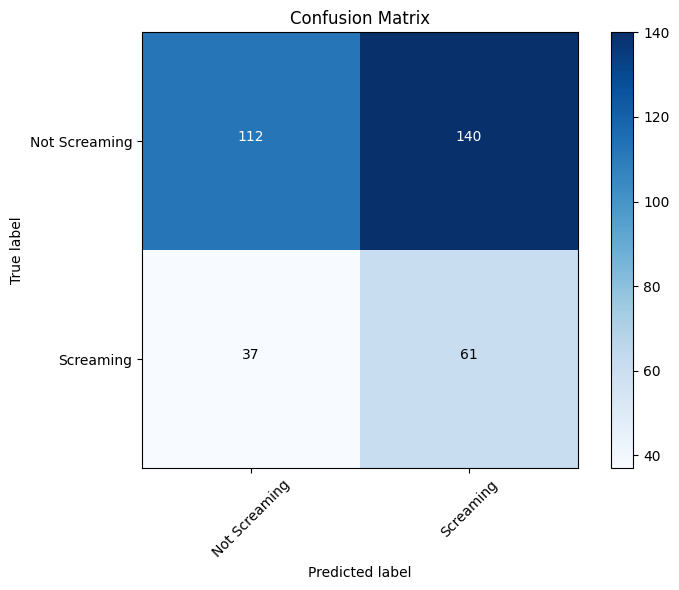

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

###Plot the Model after Data Augmentation

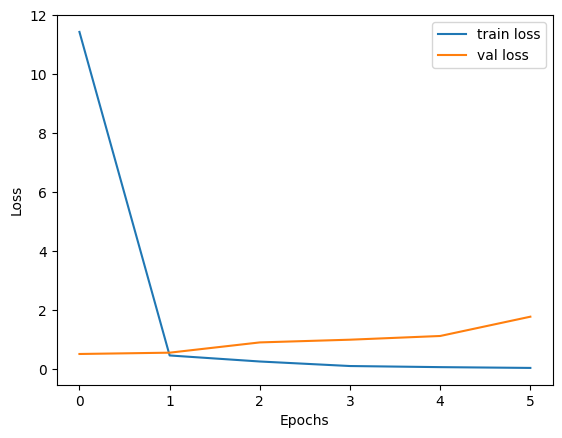

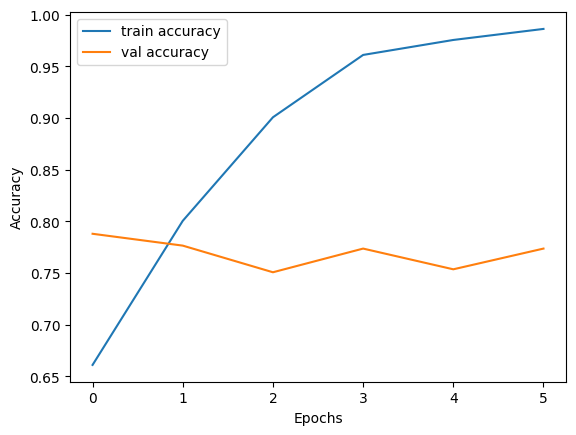

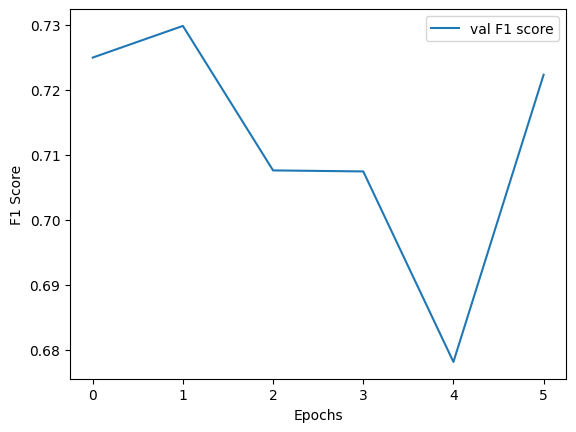

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting F1 score curve
plt.plot(history.history['val_f1_score'], label='val F1 score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

## CNN Callbacks f1-score after class_weights

In [ ]:
data_path = "/content/drive/My Drive/DeepLearning/code/dataset/"

X_val = np.load(data_path + 'X_val.npy')
X_test = np.load(data_path + 'X_test.npy')
y_val = np.load(data_path + 'y_val.npy')
y_test = np.load(data_path + 'y_test.npy')
X_train = np.load(data_path + 'X_train.npy')
y_train = np.load(data_path + 'y_train.npy')

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Computation of class_weights
y_train_classes = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_classes), y=y_train_classes)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 0.654639175257732, 1: 2.1166666666666667}


##Build and Train the Model

In [ ]:
class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        super(F1ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.best_f1 = 0  # Initialize best F1 score

    def on_epoch_end(self, epoch, logs=None):
        val_pred = self.model.predict(self.validation_data[0])
        val_pred_classes = np.argmax(val_pred, axis=1)
        val_true = np.argmax(self.validation_data[1], axis=1)
        f1 = f1_score(val_true, val_pred_classes, average='macro')
        print(f' - val_f1_score: {f1:.4f}')
        logs['val_f1_score'] = f1

        if f1 > self.best_f1:
            self.best_f1 = f1
            self.model.save('best_model.h5')  # Save the best model

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Two classes: screaming (1) and not screaming (0)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape data
X_train = X_train.reshape((*X_train.shape, 1))
X_val = X_val.reshape((*X_val.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

# Define class weights
y_train_classes = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_classes), y=y_train_classes)
class_weights = dict(enumerate(class_weights))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights,
                    callbacks=[f1_callback, early_stopping])



Epoch 1/20
11/11 [==============================] - 22s 2s/step
 - val_f1_score: 0.7851


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 654s 7s/step - loss: 36.5130 - accuracy: 0.7151 - val_loss: 0.5210 - val_accuracy: 0.8109 - val_f1_score: 0.7851
Epoch 2/20
11/11 [==============================] - 19s 2s/step
 - val_f1_score: 0.7550
88/88 [==============================] - 621s 7s/step - loss: 0.5399 - accuracy: 0.7799 - val_loss: 0.5187 - val_accuracy: 0.7794 - val_f1_score: 0.7550
Epoch 3/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7888


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 652s 7s/step - loss: 0.4184 - accuracy: 0.8343 - val_loss: 0.5356 - val_accuracy: 0.8052 - val_f1_score: 0.7888
Epoch 4/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7365
88/88 [==============================] - 639s 7s/step - loss: 0.2915 - accuracy: 0.8812 - val_loss: 0.5265 - val_accuracy: 0.7564 - val_f1_score: 0.7365
Epoch 5/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7426
88/88 [==============================] - 616s 7s/step - loss: 0.2352 - accuracy: 0.9230 - val_loss: 0.6163 - val_accuracy: 0.7822 - val_f1_score: 0.7426
Epoch 6/20
11/11 [==============================] - 21s 2s/step
 - val_f1_score: 0.7480
88/88 [==============================] - 638s 7s/step - loss: 0.2234 - accuracy: 0.9213 - val_loss: 0.6849 - val_accuracy: 0.7880 - val_f1_score: 0.7480
Epoch 7/20
11/11 [==============================] - 20s 2s/step
 - val_f1_score: 0.7344
88/88 [=============================

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))


11/11 [==============================] - 22s 2s/step - loss: 0.5304 - accuracy: 0.7657
Test accuracy: 0.7657142877578735
11/11 [==============================] - 20s 2s/step
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       252
           1       0.56      0.73      0.64        98

    accuracy                           0.77       350
   macro avg       0.72      0.76      0.73       350
weighted avg       0.79      0.77      0.77       350



11/11 [==============================] - 20s 2s/step


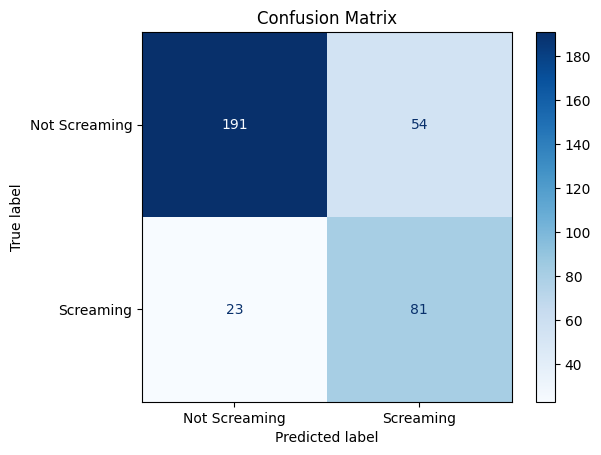

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

###Plot the loss, accuracy, f1 score






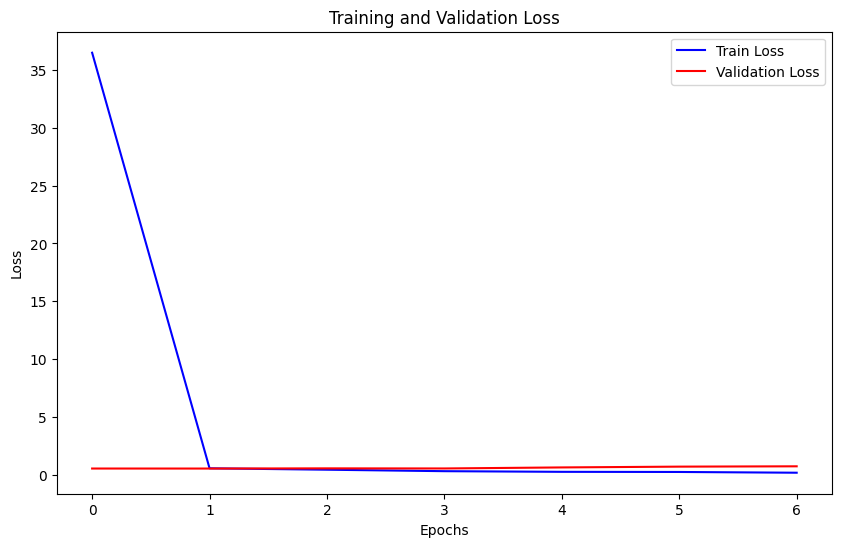

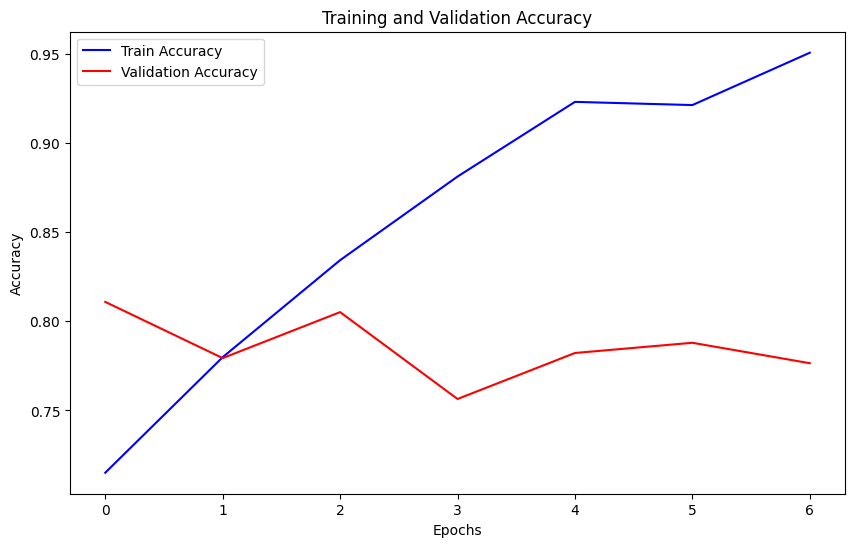

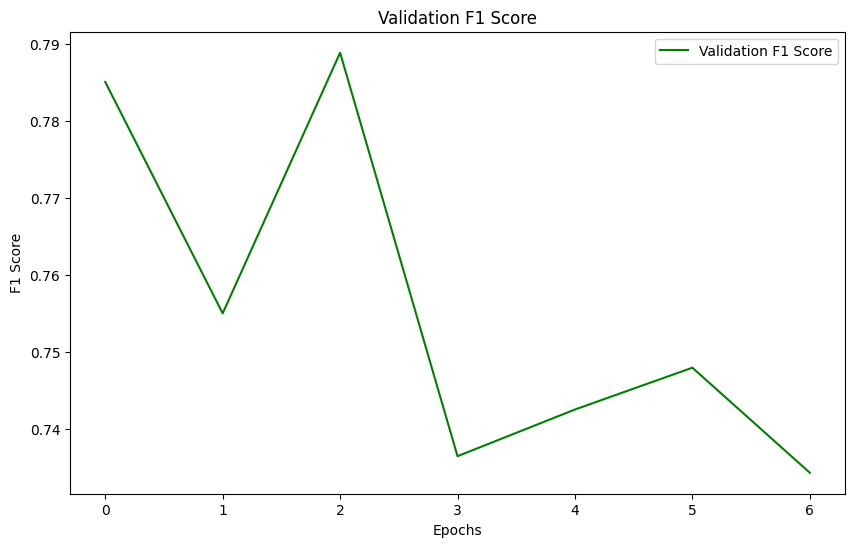

In [ ]:
# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting F1 score
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_f1_score'], label='Validation F1 Score', color='green')
plt.title('Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

##CNN F1 Score Callbacks after Data Augmentation & Class Weights

In [ ]:
# Computation of class_weights
y_train_da_classes = np.argmax(y_train_da, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_da_classes), y=y_train_da_classes)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 0.822265625, 1: 1.2757575757575759}


In [ ]:

class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        super(F1ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.best_f1 = 0  # Initialize best F1 score

    def on_epoch_end(self, epoch, logs=None):
        val_pred = self.model.predict(self.validation_data[0])
        val_pred_classes = np.argmax(val_pred, axis=1)
        val_true = np.argmax(self.validation_data[1], axis=1)
        f1 = f1_score(val_true, val_pred_classes, average='macro')
        print(f' - val_f1_score: {f1:.4f}')
        logs['val_f1_score'] = f1

        if f1 > self.best_f1:
            self.best_f1 = f1
            self.model.save('best_model.h5')  # Save the best model

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_da.shape[1], X_train_da.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Two classes: screaming (1) and not screaming (0)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape data
X_train_da = X_train_da.reshape((*X_train_da.shape, 1))
X_val = X_val.reshape((*X_val.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

# Define class weights
y_train_da_classes = np.argmax(y_train_da, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_da_classes), y=y_train_da_classes)
class_weights = dict(enumerate(class_weights))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))

# Train the model
history = model.fit(X_train_da, y_train_da,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights,
                    callbacks=[f1_callback, early_stopping])



Epoch 1/20
11/11 [==============================] - 23s 2s/step
 - val_f1_score: 0.3920


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 882s 7s/step - loss: 21.4508 - accuracy: 0.6036 - val_loss: 0.7001 - val_accuracy: 0.4040 - val_f1_score: 0.3920
Epoch 2/20
11/11 [==============================] - 17s 2s/step
 - val_f1_score: 0.7703


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


132/132 [==============================] - 850s 6s/step - loss: 0.5420 - accuracy: 0.7492 - val_loss: 0.6130 - val_accuracy: 0.7966 - val_f1_score: 0.7703
Epoch 3/20
11/11 [==============================] - 18s 2s/step
 - val_f1_score: 0.6940
132/132 [==============================] - 846s 6s/step - loss: 0.4116 - accuracy: 0.8373 - val_loss: 0.7035 - val_accuracy: 0.7278 - val_f1_score: 0.6940
Epoch 4/20
11/11 [==============================] - 19s 2s/step
 - val_f1_score: 0.6961
132/132 [==============================] - 838s 6s/step - loss: 0.3569 - accuracy: 0.8720 - val_loss: 0.6701 - val_accuracy: 0.7450 - val_f1_score: 0.6961
Epoch 5/20
11/11 [==============================] - 18s 2s/step
 - val_f1_score: 0.7120
132/132 [==============================] - 837s 6s/step - loss: 0.2110 - accuracy: 0.9268 - val_loss: 1.1390 - val_accuracy: 0.7507 - val_f1_score: 0.7120
Epoch 6/20
11/11 [==============================] - 18s 2s/step
 - val_f1_score: 0.6850
132/132 [===================

###Evaluate the Model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))# F1 score callback
f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))



11/11 [==============================] - 18s 2s/step - loss: 0.5907 - accuracy: 0.7571
Test accuracy: 0.7571428418159485
11/11 [==============================] - 18s 2s/step
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       252
           1       0.55      0.68      0.61        98

    accuracy                           0.76       350
   macro avg       0.71      0.73      0.72       350
weighted avg       0.78      0.76      0.76       350



11/11 [==============================] - 20s 2s/step


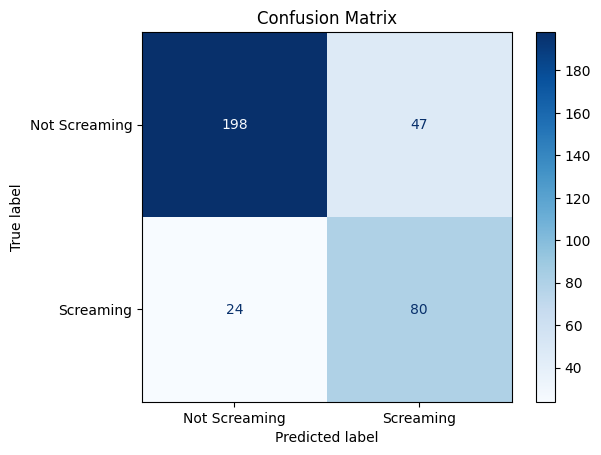

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

###Plot the loss and acurracy

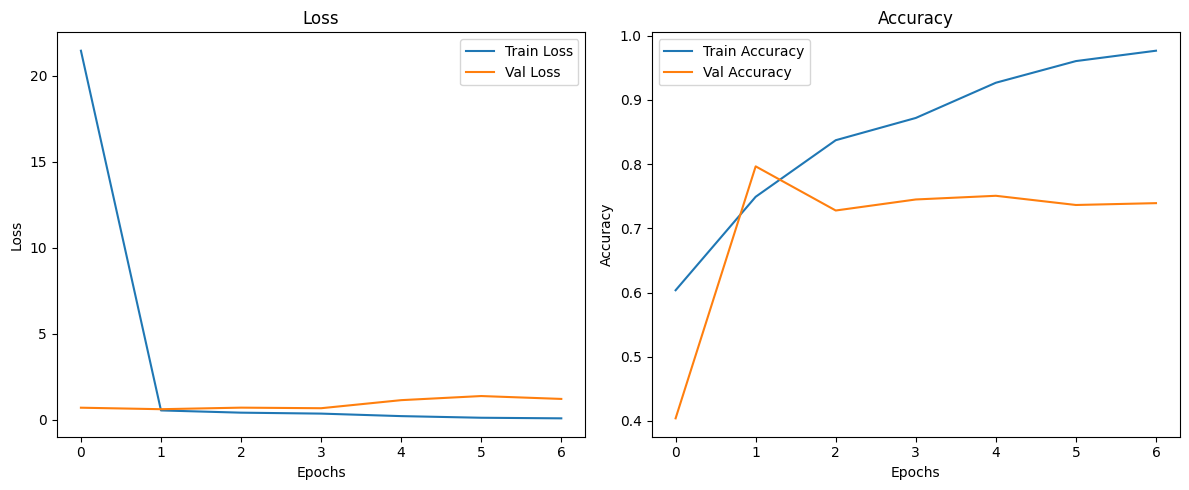

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()